# Part3: Football Transfer Market Data ML Modelling

### This notebook focuses on implementing Machine Learning Algorithms for evaluating football player transfer market vlaues. Various train:test splits, evaluation, validation and hyperparameter tuning techniques are leveraged in optimising each model

#### <span style="color:Teal"> Importing Dependencies</span>

In [335]:
# Visualization Libraries
import matplotlib
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn

#Preprocessing Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, classification_report

# ML Libraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV


# Evaluation Metrics
#from yellowbrick.classifier import ClassificationReport
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

pd.set_option('display.max_row', None)
pd.set_option('display.max_columns', None)

### First Model: Linear Regression on only Numerical Features ( No Scaling or Feature Selection)

#### <span style="color:Teal">Loading Data</span>

In [218]:
# NO SCALING

# One-hot label encoded but no scaling or feature selection
df8_dummies_all = pd.read_csv('df8_dummies_all.csv')

# Only numerical features, no scaling or feature selection
numerical_features_df = pd.read_csv('numerical_features_df.csv')


# # MINMAX SCALER

# # Only Numerical Features and MINMAX Scaling
# numerical_features_df_4_midmax_scaled = pd.read_csv('numerical_features_df_4_midmax_scaled.csv')

# # One-hot label encoded on select Categorical features(last_season, foot, position, sub_position, age_group) 
# # and MinMax Scaling NO Feature Selection
df8_dummies_essential_mm_scaled = pd.read_csv('df8_dummies_essential_mm_scaled.csv')

# # One-hot label encoded on ALL Categorical features and MinMAx Scaling, NO Feature Selection
df8_dummies_all_mm_scaled = pd.read_csv('df8_dummies_all_mm_scaled.csv')

# # One-hot label encoded on ALL Categorical features with Feature Selection and MinMax Scaling
# df8_dummies_all_fs_mm_scaled = pd.read_csv('df8_dummies_all_fs_mm_scaled.csv')


# # ROBUST SCALER

# # Only Numerical Features and Robust Scaling
# numerical_features_df_rb_scaled = pd.read_csv('numerical_features_df_rb_scaled.csv')

# # One-hot label encoded on select Categorical features(last_season, foot, position, sub_position, age_group) 
# # and Robust Scaling NO Feature Selection
# df8_dummies_essential_rb_scaled = pd.read_csv('df8_dummies_essential_rb_scaled.csv')

# # One-hot label encoded on ALL Categorical features and Robust Scaling, NO Feature Selection
df8_dummies_all_rb_scaled = pd.read_csv('df8_dummies_all_rb_scaled.csv')

# # One-hot label encoded on ALL Categorical features with Feature Selection and Robust Scaling
df8_dummies_all_fs_rb_scaled = pd.read_csv('df8_dummies_all_fs_rb_scaled.csv')

#### <span style="color:Teal">Confirming Load</span>

In [110]:
numerical_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10168 entries, 0 to 10167
Data columns (total 59 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   current_club_id          10168 non-null  int64  
 1   height_in_cm             10168 non-null  float64
 2   market_value_in_eur      10168 non-null  float64
 3   age                      10168 non-null  int64  
 4   remaining_contract_days  10168 non-null  int64  
 5   games_total              10168 non-null  int64  
 6   goals_total              10168 non-null  int64  
 7   assists_total            10168 non-null  int64  
 8   minutes_played_total     10168 non-null  int64  
 9   goals_for_total          10168 non-null  int64  
 10  goals_against_total      10168 non-null  int64  
 11  clean_sheet_total        10168 non-null  int64  
 12  yellow_cards_total       10168 non-null  int64  
 13  red_cards_total          10168 non-null  int64  
 14  games_2019            

In [111]:
numerical_features_df.shape

(10168, 59)

#### <span style="color:Teal">Isolating target Variable</span>

In [112]:
y = numerical_features_df['market_value_in_eur']

In [113]:
y.shape

(10168,)

In [114]:
y.head()

0    25000000.0
1      200000.0
2     2500000.0
3      200000.0
4      200000.0
Name: market_value_in_eur, dtype: float64

In [115]:
X = numerical_features_df.drop(['market_value_in_eur'], axis = 1)

In [116]:
X.shape

(10168, 58)

### <span style="color:Teal">First Split: 90% Training and 10% for Testing</span>

In [117]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1,  random_state = 42) # 90% training and 10% test

In [118]:
# Show the rows and columns
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10168, 58), (10168,), (9151, 58), (1017, 58), (9151,), (1017,))

In [119]:
#Instantiating a class of Linear Regression 
lr = LinearRegression()

In [120]:
# Training the model
lr.fit(X_train, y_train)

LinearRegression()

In [121]:
# Method to calculate the cross-validation scores and additional metrics
def get_cv_scores(model):
    # Cross-validation scores
    scores = cross_val_score(model, X_train, y_train, cv=10, scoring='r2')
    
    # Additional metrics
    y_pred = model.predict(X_train)
    mae = mean_absolute_error(y_train, y_pred)
    mse = mean_squared_error(y_train, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_train, y_pred)
    
    # Display cross-validation scores
    print('CV Mean R²: ', np.mean(scores))
    print('CV STD: ', np.std(scores))
    
    # Display additional metrics
    print('Mean Absolute Error (MAE): ', mae)
    print('Mean Squared Error (MSE): ', mse)
    print('Root Mean Squared Error (RMSE): ', rmse)
    print('R-squared (R²): ', r2)
    print('\n')

In [122]:
# Calculate the mean values and Standard deviation
get_cv_scores(lr)

CV Mean R²:  0.47073213209280906
CV STD:  0.053393224849868914
Mean Absolute Error (MAE):  3809591.7146170284
Mean Squared Error (MSE):  50217410489758.555
Root Mean Squared Error (RMSE):  7086424.379738949
R-squared (R²):  0.49677885162408064




The CV Mean R²  above is not the worst for the first model and current dataset of only Numerical Variables. The MAE, MSE and RMSE are very high which indicates a considerable difference between taining and testing values.

CV Mean R²: The mean of the cross-validation scores (`r2` in this case). It represents the average performance of the model across different folds (10) in the cross-validation process. Higher values indicate better performance. `r2` (coefficient of determination) ranges from 0 to 1, where 1 indicates perfect predictions.

CV STD: The standard deviation of the cross-validation scores. It measures the amount of variation or dispersion of the model's performance across different folds. Lower values indicate more consistent performance.

Mean Absolute Error (MAE): It measures the average absolute differences between predicted and actual values. It provides a straightforward interpretation of the average prediction error with a lower value indicating better performance. It is less sensitive to outliers.

Mean Squared Error (MSE): It calculates the average of the squared differences between predicted and actual values. MSE penalizes larger errors more heavily than MAE. MSE is commonly used but sensitive to outliers. Lower values are better.

Root Mean Squared Error (RMSE): It is the square root of MSE and provides an interpretable measure in the same units as the target variable. RMSE penalizes larger errors more than MAE and is sensitive to outliers. Lower values are better.
 
R-squared (R²): It measures the proportion of the variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, where 1 indicates a perfect fit.

In [123]:
# Calculate the intercept and coefficient
print(lr.intercept_)
print('\n',lr.coef_)

6124551.822244249

 [-5.28816685e+00  8.56536457e+03 -3.85497140e+05  3.58377098e+03
 -1.44150798e+05  2.14908657e+05  5.59862654e+04  1.27580181e+03
  7.08263252e+04 -2.62077013e+04  9.27464950e+04  4.56146571e+04
 -5.56696689e+05  2.26727717e+05 -3.28798497e+05 -9.01444815e+04
 -1.68495690e+03 -5.94102394e+04 -1.08763489e+03 -7.46448863e+03
 -5.59639018e+04  7.01911959e+05  1.08946540e+04 -1.86338756e+05
 -3.19805664e+03  1.70816486e+02 -1.10834240e+04  2.39672324e+03
  8.58061238e+04 -1.61708825e+05 -5.58967725e+05 -2.34761777e+05
  6.79882761e+02  2.03861549e+05  2.48193000e+02  7.10672968e+04
  7.87256956e+04  2.51180085e+04  1.81925556e+04 -3.06786726e+05
  2.25629548e+05  2.70336151e+05  2.54810807e+05  5.83525074e+02
 -5.38503456e+04 -9.60861863e+04 -1.35238938e+05  1.08334160e+05
 -1.04342537e+05 -3.72640941e+05  4.59029877e+05 -3.09343552e+05
  1.95822414e+03  1.24103037e+05 -1.01562989e+04  1.24525789e+05
  1.36760669e+05 -2.88511660e+05]


The y-intercept (intercept variable) and the slope or coefficient which are parameters learnt by the model. Linear regression finds the parameters a and b that minimize the mean squared error between predictions and the true regression targets, y, on the training set.

In [124]:
# Comparing training to testing results
print(f'R² training set score: {lr.score(X_train, y_train)}')
print(f'R² testing set score: {lr.score(X_test, y_test)}')

R² training set score: 0.49677885162408064
R² testing set score: 0.37396667115895665


The results from this first model are are poor with an accuarcy of 0.37. This is to be expected as the dataset used does not include the domestic leagues or positions of players.

In [125]:
# Calculate the predicted values
y_pred = lr.predict(X_test)

In [126]:
# Display the test and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
9772,25000.0,-6.661725e+05
2337,500000.0,1.099419e+06
9588,100000.0,1.452277e+06
2233,50000.0,2.379355e+06
4122,2000000.0,-6.178865e+05


### <span style="color:Teal">Second Split: 80% Training and 20% for Testing</span>

In [127]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,  random_state = 42) # 80% training and 20% test# Split dataset into training set and test set


In [128]:
# Show the rows and columns
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10168, 58), (10168,), (8134, 58), (2034, 58), (8134,), (2034,))

In [129]:
#Instantiating a class of Linear Regression 
lr = LinearRegression()

In [130]:
# Training the model
lr.fit(X_train, y_train)

LinearRegression()

In [131]:
# Calculate the mean values and Standard deviation
get_cv_scores(lr)

CV Mean R²:  0.4720516135907701
CV STD:  0.05235418367636861
Mean Absolute Error (MAE):  3812869.089316188
Mean Squared Error (MSE):  49577224508102.8
Root Mean Squared Error (RMSE):  7041109.607732492
R-squared (R²):  0.4948315651392249




In [132]:
# Comparing training to testing results
print(f'R² training set score: {lr.score(X_train, y_train)}')
print(f'R² testing set score: {lr.score(X_test, y_test)}')

R² training set score: 0.4948315651392249
R² testing set score: 0.45441396948160184


There is an improvement in results on a 80:20 trains:test split.

In [133]:
# Calculate the predicted values
y_pred = lr.predict(X_test)

In [134]:
# Display the test and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
9772,25000.0,-7.371869e+05
2337,500000.0,1.257227e+06
9588,100000.0,1.489214e+06
2233,50000.0,2.287051e+06
4122,2000000.0,-5.979624e+05


### <span style="color:Teal">Third Split: 70% Training and 30% for Testing</span>

In [135]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,  random_state = 42) 

In [136]:
# Show the rows and columns
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10168, 58), (10168,), (7117, 58), (3051, 58), (7117,), (3051,))

In [137]:
#Instantiating a class of Linear Regression 
lr = LinearRegression()

In [138]:
# Training the model
lr.fit(X_train, y_train)

LinearRegression()

In [139]:
# Calculate the mean values and Standard deviation
get_cv_scores(lr)

CV Mean R²:  0.46823361542286124
CV STD:  0.051482301740775505
Mean Absolute Error (MAE):  3776729.122741695
Mean Squared Error (MSE):  47967368096260.78
Root Mean Squared Error (RMSE):  6925847.825086888
R-squared (R²):  0.5013748469704211




The CV Mean R² has dropped with a 70:30 train:test split but so too has the STD.

In [140]:
# Comparing training to testing results
print(f'R² training set score: {lr.score(X_train, y_train)}')
print(f'R² testing set score: {lr.score(X_test, y_test)}')

R² training set score: 0.5013748469704211
R² testing set score: 0.4499666859178947


In [141]:
# Calculate the predicted values
y_pred = lr.predict(X_test)

In [142]:
# Display the test and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
9772,25000.0,-7.520807e+05
2337,500000.0,1.345985e+06
9588,100000.0,1.471976e+06
2233,50000.0,2.267469e+06
4122,2000000.0,-4.839169e+05


## Second Model: Linear Regression on Full Dummies Dataset ( No Scaling or Feature Selection)

In [143]:
df8_dummies_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10168 entries, 0 to 10167
Columns: 374 entries, current_club_id to current_club_name_Ümraniyespor
dtypes: float64(2), int64(372)
memory usage: 29.0 MB


#### <span style="color:Teal">Isolating target Variable</span>

In [144]:
y = df8_dummies_all['market_value_in_eur']

In [145]:
y.shape

(10168,)

In [146]:
X = df8_dummies_all.drop(['market_value_in_eur'], axis = 1)

In [147]:
X.shape

(10168, 373)

### <span style="color:Teal">First Split: 90% Training and 10% for Testing</span>

In [148]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1,  random_state = 42) # 90% training and 10% test

In [149]:
# Show the rows and columns
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10168, 373), (10168,), (9151, 373), (1017, 373), (9151,), (1017,))

In [150]:
#Instantiating a class of Linear Regression 
lr = LinearRegression()

In [151]:
# Training the model
lr.fit(X_train, y_train)

LinearRegression()

In [152]:
# Calculate the mean values and Standard deviation
get_cv_scores(lr)

CV Mean R²:  0.5895488384360613
CV STD:  0.0563729971925034
Mean Absolute Error (MAE):  3361968.8122840365
Mean Squared Error (MSE):  35990246978812.83
Root Mean Squared Error (RMSE):  5999187.193179825
R-squared (R²):  0.6393471260589041




An improvement in scores which is to be expected as the dataset in use contains contains all categorical variables following one-hot label encoding.

In [153]:
# Comparing training to testing results
print(f'R² training set score: {lr.score(X_train, y_train)}')
print(f'R² testing set score: {lr.score(X_test, y_test)}')

R² training set score: 0.6393471260589041
R² testing set score: 0.534738839162484


The model appears to be slighlty underfitting with a higher training score than testing.

In [154]:
# Calculate the predicted values
y_pred = lr.predict(X_test)

In [155]:
# Display the test and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
9772,25000.0,-1.406327e+06
2337,500000.0,-1.037822e+06
9588,100000.0,6.859466e+06
2233,50000.0,2.608641e+06
4122,2000000.0,5.488002e+05


### <span style="color:Teal">First Split: 80% Training and 20% for Testing</span>

In [156]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,  random_state = 42) 

In [157]:
# Show the rows and columns
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10168, 373), (10168,), (8134, 373), (2034, 373), (8134,), (2034,))

In [158]:
#Instantiating a class of Linear Regression 
lr = LinearRegression()

In [159]:
# Training the model
lr.fit(X_train, y_train)

LinearRegression()

In [160]:
# Calculate the mean values and Standard deviation
get_cv_scores(lr)

CV Mean R²:  0.5925111953780882
CV STD:  0.03531682361652216
Mean Absolute Error (MAE):  3358520.5260272273
Mean Squared Error (MSE):  35522385030735.4
Root Mean Squared Error (RMSE):  5960065.8579193065
R-squared (R²):  0.6380437221618656




The STD on 10-fold CV has reduced considerably from previous models which is promising.

In [161]:
# Calculate the mean values and Standard deviation
get_cv_scores(lr)

CV Mean R²:  0.5925111953780882
CV STD:  0.03531682361652216
Mean Absolute Error (MAE):  3358520.5260272273
Mean Squared Error (MSE):  35522385030735.4
Root Mean Squared Error (RMSE):  5960065.8579193065
R-squared (R²):  0.6380437221618656




In [162]:
# Comparing training to testing results
print(f'R² training set score: {lr.score(X_train, y_train)}')
print(f'R² testing set score: {lr.score(X_test, y_test)}')

R² training set score: 0.6380437221618656
R² testing set score: 0.5896746569209096


The model appears to be generalising better on an 80:20 test:train split.

In [163]:
# Calculate the predicted values
y_pred = lr.predict(X_test)

In [164]:
# Display the test and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
9772,25000.0,-1.883180e+06
2337,500000.0,-8.497077e+05
9588,100000.0,6.489852e+06
2233,50000.0,2.881348e+06
4122,2000000.0,2.108293e+05


### <span style="color:Teal">First Split: 70% Training and 30% for Testing</span>

In [165]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,  random_state = 42) 

In [166]:
# Show the rows and columns
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10168, 373), (10168,), (7117, 373), (3051, 373), (7117,), (3051,))

In [167]:
#Instantiating a class of Linear Regression 
lr = LinearRegression()

In [168]:
# Training the model
lr.fit(X_train, y_train)

LinearRegression()

In [169]:
# Calculate the mean values and Standard deviation
get_cv_scores(lr)

CV Mean R²:  0.5772943054300581
CV STD:  0.048884699062744605
Mean Absolute Error (MAE):  3330076.8223675066
Mean Squared Error (MSE):  34664661336619.723
Root Mean Squared Error (RMSE):  5887670.280902262
R-squared (R²):  0.6396576933509527




In [170]:
# Comparing training to testing results
print(f'R² training set score: {lr.score(X_train, y_train)}')
print(f'R² testing set score: {lr.score(X_test, y_test)}')

R² training set score: 0.6396576933509527
R² testing set score: 0.5925137008357042


In [171]:
# Calculate the predicted values
y_pred = lr.predict(X_test)

In [172]:
# Display the test and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
9772,25000.0,-1.555862e+06
2337,500000.0,-1.276385e+06
9588,100000.0,6.180624e+06
2233,50000.0,2.923863e+06
4122,2000000.0,1.246844e+05


Again, the Linear Regression Model is performing better to the data on an 80:20 train:test split.

## Third Model: Linear Regression on Reduced Dummies Dataset ( MinMax Scaled)

In [173]:
df8_dummies_essential_mm_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10168 entries, 0 to 10167
Data columns (total 86 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   current_club_id                  10168 non-null  float64
 1   height_in_cm                     10168 non-null  float64
 2   market_value_in_eur              10168 non-null  float64
 3   age                              10168 non-null  float64
 4   remaining_contract_days          10168 non-null  float64
 5   games_total                      10168 non-null  float64
 6   goals_total                      10168 non-null  float64
 7   assists_total                    10168 non-null  float64
 8   minutes_played_total             10168 non-null  float64
 9   goals_for_total                  10168 non-null  float64
 10  goals_against_total              10168 non-null  float64
 11  clean_sheet_total                10168 non-null  float64
 12  yellow_cards_total

#### <span style="color:Teal">Isolating target Variable</span>

In [174]:
y = df8_dummies_essential_mm_scaled['market_value_in_eur']

In [175]:
y.shape

(10168,)

In [176]:
X = df8_dummies_essential_mm_scaled.drop(['market_value_in_eur'], axis = 1)

In [177]:
X.shape

(10168, 85)

### <span style="color:Teal">Split: 80% Training and 20% for Testing</span>

In [178]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,  random_state = 42) 

In [179]:
# Show the rows and columns
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10168, 85), (10168,), (8134, 85), (2034, 85), (8134,), (2034,))

In [180]:
#Instantiating a class of Linear Regression 
lr = LinearRegression()

In [181]:
# Training the model
lr.fit(X_train, y_train)

LinearRegression()

In [182]:
# Calculate the mean values and Standard deviation
get_cv_scores(lr)

CV Mean R²:  0.47469745697051485
CV STD:  0.051922159970132824
Mean Absolute Error (MAE):  0.020992143524748232
Mean Squared Error (MSE):  0.0015151055411705878
Root Mean Squared Error (RMSE):  0.03892435665711879
R-squared (R²):  0.4998576427754219




In [183]:
# Comparing training to testing results
print(f'R² training set score: {lr.score(X_train, y_train)}')
print(f'R² testing set score: {lr.score(X_test, y_test)}')

R² training set score: 0.4998576427754219
R² testing set score: 0.45659404721508934


In [184]:
# Calculate the predicted values
y_pred = lr.predict(X_test)

In [ ]:
# Display the test and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

The model evaluation scores are worse on this dataset. This dataset contains a select few categorical variables in last_season, foot, position, sub_position and age_group which have been one-hot label encoded and numerical varaiables scaled with the MinMax Scaler.

## Third Model: Linear Regression on Full Dummies Dataset ( MinMax Scaled)

In [203]:
df8_dummies_all_mm_scaled.shape

(10168, 374)

In [204]:
df8_dummies_all_mm_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10168 entries, 0 to 10167
Columns: 374 entries, current_club_id to current_club_name_Ümraniyespor
dtypes: float64(59), int64(315)
memory usage: 29.0 MB


#### <span style="color:Teal">Isolating target Variable</span>

In [205]:
y = df8_dummies_all_mm_scaled['market_value_in_eur']

In [206]:
y.shape

(10168,)

In [207]:
X = df8_dummies_all_mm_scaled.drop(['market_value_in_eur'], axis = 1)

In [208]:
X.shape

(10168, 373)

### <span style="color:Teal">Split: 80% Training and 20% for Testing</span>

In [209]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,  random_state = 42) 

In [210]:
# Show the rows and columns
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10168, 373), (10168,), (8134, 373), (2034, 373), (8134,), (2034,))

In [211]:
#Instantiating a class of Linear Regression 
lr = LinearRegression()

In [212]:
# Training the model
lr.fit(X_train, y_train)

LinearRegression()

In [213]:
# Calculate the mean values and Standard deviation
get_cv_scores(lr)

CV Mean R²:  0.5916710096578333
CV STD:  0.0358957904861988
Mean Absolute Error (MAE):  0.018642846626075762
Mean Squared Error (MSE):  0.0010963330601905354
Root Mean Squared Error (RMSE):  0.033110920557884456
R-squared (R²):  0.6380961021347137




This Model on MinMAx scaled data results indicate good generalising of the model.

In [214]:
# Comparing training to testing results
print(f'R² training set score: {lr.score(X_train, y_train)}')
print(f'R² testing set score: {lr.score(X_test, y_test)}')

R² training set score: 0.6380961021347137
R² testing set score: 0.5899301185366463


In [215]:
# Calculate the predicted values
y_pred = lr.predict(X_test)

In [216]:
# Display the test and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
9772,0.000083,-0.009621
2337,0.002722,-0.005655
9588,0.000500,0.035402
2233,0.000222,0.015766
4122,0.011056,0.001451


The models so far are definitely performing better on the larger datasets with all features.

## Fourth Model: Linear Regression on  Dummies Dataset  with Feature Selection based on Pearson Correlation( Robust Scaled)

In [219]:
df8_dummies_all_fs_rb_scaled.shape

(10168, 65)

In [220]:
df8_dummies_all_fs_rb_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10168 entries, 0 to 10167
Data columns (total 65 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   current_club_id                           10168 non-null  float64
 1   market_value_in_eur                       10168 non-null  float64
 2   remaining_contract_days                   10168 non-null  float64
 3   games_total                               10168 non-null  float64
 4   goals_total                               10168 non-null  float64
 5   assists_total                             10168 non-null  float64
 6   minutes_played_total                      10168 non-null  float64
 7   goals_for_total                           10168 non-null  float64
 8   goals_against_total                       10168 non-null  float64
 9   clean_sheet_total                         10168 non-null  float64
 10  yellow_cards_total                

#### <span style="color:Teal">Isolating target Variable</span>

In [221]:
y = df8_dummies_all_fs_rb_scaled['market_value_in_eur']

In [222]:
y.shape

(10168,)

In [223]:
X = df8_dummies_all_fs_rb_scaled.drop(['market_value_in_eur'], axis = 1)

In [225]:
X.shape

(10168, 64)

### <span style="color:Teal">Split: 80% Training and 20% for Testing</span>

In [226]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,  random_state = 42) 

In [227]:
# Show the rows and columns
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10168, 64), (10168,), (8134, 64), (2034, 64), (8134,), (2034,))

In [228]:
#Instantiating a class of Linear Regression 
lr = LinearRegression()

In [229]:
# Training the model
lr.fit(X_train, y_train)

LinearRegression()

In [230]:
# Calculate the mean values and Standard deviation
get_cv_scores(lr)

CV Mean R²:  0.5303348638263463
CV STD:  0.06226616330870756
Mean Absolute Error (MAE):  1.4065395701589007
Mean Squared Error (MSE):  6.6308766534830035
Root Mean Squared Error (RMSE):  2.5750488642903466
R-squared (R²):  0.5777156731203013




In [231]:
# Comparing training to testing results
print(f'R² training set score: {lr.score(X_train, y_train)}')
print(f'R² testing set score: {lr.score(X_test, y_test)}')

R² training set score: 0.5777156731203013
R² testing set score: 0.5357891089948299


In [232]:
# Calculate the predicted values
y_pred = lr.predict(X_test)

In [233]:
# Display the test and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
9772,-0.31,-1.579590
2337,-0.12,1.352783
9588,-0.28,1.974365
2233,-0.30,0.017334
4122,0.48,-0.867188


Again, this dataset with specific features selected based on higher correlation to the target variable has performed worse.

## Fifth Model: Linear Regression on  Dummies Dataset with all features ( Robust Scaled)

In [234]:
df8_dummies_all_rb_scaled.shape

(10168, 374)

In [235]:
df8_dummies_all_rb_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10168 entries, 0 to 10167
Columns: 374 entries, current_club_id to current_club_name_Ümraniyespor
dtypes: float64(59), int64(315)
memory usage: 29.0 MB


#### <span style="color:Teal">Isolating target Variable</span>

In [236]:
y = df8_dummies_all_rb_scaled['market_value_in_eur']

In [237]:
y.shape

(10168,)

In [238]:
X = df8_dummies_all_rb_scaled.drop(['market_value_in_eur'], axis = 1)

In [239]:
X.shape

(10168, 373)

### <span style="color:Teal">Split: 80% Training and 20% for Testing</span>

In [240]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,  random_state = 42)

In [241]:
# Show the rows and columns
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10168, 373), (10168,), (8134, 373), (2034, 373), (8134,), (2034,))

In [242]:
#Instantiating a class of Linear Regression 
lr = LinearRegression()

In [243]:
# Training the model
lr.fit(X_train, y_train)

LinearRegression()

In [244]:
# Calculate the mean values and Standard deviation
get_cv_scores(lr)

CV Mean R²:  0.5924988623113406
CV STD:  0.0350881748283972
Mean Absolute Error (MAE):  1.3396654892897868
Mean Squared Error (MSE):  5.683656494144298
Root Mean Squared Error (RMSE):  2.384042049575531
R-squared (R²):  0.6380389528759457




The results for CV Mean R² and CV STD are very similar but slightly better than the model with data that had been scaled using the MinMax scaler. The MAE, MAE and RMSE are higher which indicates that it does not generalise as well as the MINMAX scaled data Model. The features are the same.

In [245]:
# Comparing training to testing results
print(f'R² training set score: {lr.score(X_train, y_train)}')
print(f'R² testing set score: {lr.score(X_test, y_test)}')

R² training set score: 0.6380389528759457
R² testing set score: 0.5904014458104625


In [246]:
# Calculate the predicted values
y_pred = lr.predict(X_test)

In [247]:
# Display the test and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
9772,-0.31,-1.006592
2337,-0.12,-0.735107
9588,-0.28,2.229004
2233,-0.30,0.804199
4122,0.48,-0.227783


## Sixth Model: Ridge Regression on  Dummies Dataset with all features ( Robust Scaled)

In [249]:
# Instantiating and Fitting model to data
ridge = Ridge().fit(X_train, y_train)

In [250]:
# Calculate the mean values and Standard deviation
get_cv_scores(ridge)

CV Mean R²:  0.593642610677101
CV STD:  0.03521094035750554
Mean Absolute Error (MAE):  1.340109237543643
Mean Squared Error (MSE):  5.683967778190859
Root Mean Squared Error (RMSE):  2.384107333613749
R-squared (R²):  0.6380191288947529




In [252]:
# Comparing training to testing results
print(f'R² training set score: {ridge.score(X_train, y_train)}')
print(f'R² testing set score: {ridge.score(X_test, y_test)}')

R² training set score: 0.6380191288947529
R² testing set score: 0.590368406172169


#### <span style="color:Teal">Adjusting hyperparameters</span>

In [260]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)

In [261]:
# Comparing training to testing results
print(f'R² training set score: {ridge10.score(X_train, y_train)}')
print(f'R² testing set score: {ridge10.score(X_test, y_test)}')

R² training set score: 0.6328580344598841
R² testing set score: 0.5880983886984735


In [262]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)


In [263]:
# Comparing training to testing results
print(f'R² training set score: {ridge01.score(X_train, y_train)}')
print(f'R² testing set score: {ridge01.score(X_test, y_test)}')

R² training set score: 0.6381120161565172
R² testing set score: 0.5900625860019808


Ridge regression using L2 regularistaion scored almost identically to the previous linear regression model which is no surpise as it too is a linear model. Ridge regression would be better suited if the previous model was overfitting as its restricts a model through regularisation.

## Seventh Model: Lasso Regression on  Dummies Dataset with all features ( Robust Scaled)

In [265]:
# Instantiating and Fitting model to data
lasso = Lasso().fit(X_train, y_train)

In [266]:
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))


Training set score: 0.27
Test set score: 0.29
Number of features used: 7


Both the training and test scores are low which indicates underfitting.

#### <span style="color:Teal">Adjusting hyperparameters</span>

In [267]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)

In [268]:
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.59
Test set score: 0.55
Number of features used: 66


In [269]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))


Training set score: 0.64
Test set score: 0.59
Number of features used: 340


The scores unsurprising have not improved on previous models linear and ridge models.

Lasso Regression, like Ridge regression are good for regularising linear regression. Lasso uses L1 regularisation which can be seen as a form of feature selection as it reduces some coefficinets to zero, only using the most important features. Again, like Ridge it would be better utilised on an overfitting linear regression model.

## Eighth Model: Random Forest Regressor on  Dummies Dataset with all features ( Robust Scaled)

In [271]:
#Instantiating Random Forest Regressor algorithm and storing it to 'forest' object
forest = RandomForestRegressor()

In [272]:
#Fitting the model to nthe data
forest.fit(X_train, y_train)

RandomForestRegressor()

In [273]:
# Calculate the mean values and Standard deviation
get_cv_scores(forest)

CV Mean R²:  0.7066386980658086
CV STD:  0.0391061450124774
Mean Absolute Error (MAE):  0.292116524587587
Mean Squared Error (MSE):  0.629682838717122
Root Mean Squared Error (RMSE):  0.7935255753390196
R-squared (R²):  0.959898938316748




The Random Forest Regeressor has produced the best CV Mean R² score so far at 0.71. MAE, MSE and RMSE are also promising.

In [274]:
# Comparing training to testing results
print(f'R² training set score: {forest.score(X_train, y_train)}')
print(f'R² testing set score: {forest.score(X_test, y_test)}')

R² training set score: 0.959898938316748
R² testing set score: 0.7172613044808764


The training and test results above indicate and overfitting model.

## Ninth Model: Random Forest Regressor on  Dummies Dataset with all features ( MinMax Scaled)

Applying Random Forest Regressor algorithm to MinMAx Scaled data as this produced a more generalised model when used on a Linear Regression model.

In [282]:
y = df8_dummies_all_mm_scaled['market_value_in_eur']

In [283]:
y.shape

(10168,)

In [284]:
X = df8_dummies_all_mm_scaled.drop(['market_value_in_eur'], axis = 1)

In [285]:
X.shape

(10168, 373)

### <span style="color:Teal">Split: 80% Training and 20% for Testing</span>

In [286]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,  random_state = 42) 

In [287]:
# Show the rows and columns
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10168, 373), (10168,), (8134, 373), (2034, 373), (8134,), (2034,))

#### <span style="color:Teal">Modelling</span>

In [288]:
#Instantiating Random Forest Regressor algorithm and storing it to 'forest' object
forest = RandomForestRegressor()

In [289]:
#Fitting the model to nthe data
forest.fit(X_train, y_train)

RandomForestRegressor()

#### <span style="color:Teal">Evaluating the Model</span>

In [290]:
# Calculate the mean values and Standard deviation
get_cv_scores(forest)

CV Mean R²:  0.7069506879434364
CV STD:  0.03635995536991886
Mean Absolute Error (MAE):  0.004094586475040317
Mean Squared Error (MSE):  0.00012470795347825934
Root Mean Squared Error (RMSE):  0.011167271532395877
R-squared (R²):  0.9588334092098425




In [291]:
# Comparing training to testing results
print(f'R² training set score: {forest.score(X_train, y_train)}')
print(f'R² testing set score: {forest.score(X_test, y_test)}')

R² training set score: 0.9588334092098425
R² testing set score: 0.7332104307052365


In [295]:
# Calculate the predicted values
y_pred = forest.predict(X_test)

In [296]:
# Display the test and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
9772,0.000083,0.000855
2337,0.002722,0.005010
9588,0.000500,0.004641
2233,0.000222,0.003501
4122,0.011056,0.004205


The resulst are at least in the same ball park unlike previous models

### <span style="color:Teal">Split: 90% Training and 10% for Testing</span>

In [303]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1,  random_state = 42) 

In [304]:
#Fitting the model to nthe data
forest.fit(X_train, y_train)

RandomForestRegressor()

#### <span style="color:Teal">Evaluating the Model</span>

In [305]:
# Calculate the mean values and Standard deviation
get_cv_scores(forest)

CV Mean R²:  0.7156304018368109
CV STD:  0.03605767081595555
Mean Absolute Error (MAE):  0.004029437935089631
Mean Squared Error (MSE):  0.00011964819963889735
Root Mean Squared Error (RMSE):  0.010938381947934409
R-squared (R²):  0.9611574715601694




The 90:10 train:test split produces the best results. Although we see signs of overfitting below, the MAE, MSE and RMSE are quite low indicating the lowest difference so far between actual and prediccted values. 

In [306]:
# Comparing training to testing results
print(f'R² training set score: {forest.score(X_train, y_train)}')
print(f'R² testing set score: {forest.score(X_test, y_test)}')

R² training set score: 0.9611574715601694
R² testing set score: 0.7356555852201675


The model is still overfitting to the training dataset. Overfitting is not uncommon for Random Forest models. We may need to appy pruning or early stopping or some other hyperparameter tuning to counter this.

In [307]:
# Calculate the predicted values
y_pred = forest.predict(X_test)

In [308]:
# Display the test and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
9772,0.000083,0.000442
2337,0.002722,0.005420
9588,0.000500,0.004846
2233,0.000222,0.003550
4122,0.011056,0.003855


### <span style="color:Teal">Split: 70% Training and 30% for Testing</span>

In [300]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,  random_state = 42) 

In [301]:
#Fitting the model to nthe data
forest.fit(X_train, y_train)

RandomForestRegressor()

In [302]:
# Comparing training to testing results
print(f'R² training set score: {forest.score(X_train, y_train)}')
print(f'R² testing set score: {forest.score(X_test, y_test)}')

R² training set score: 0.9562298870779404
R² testing set score: 0.7048923155359867


### <span style="color:Teal">Hyperparameter Tuning</span>

# Ninth Model: Gradient Boosting Regressor on  Dummies Dataset with all features ( MinMax Scaled)

In [309]:
y = df8_dummies_all_mm_scaled['market_value_in_eur']

In [310]:
y.shape

(10168,)

In [311]:
X = df8_dummies_all_mm_scaled.drop(['market_value_in_eur'], axis = 1)

In [312]:
X.shape

(10168, 373)

### <span style="color:Teal">Split: 70% Training and 30% for Testing</span>

In [313]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,  random_state = 42) 

#### <span style="color:Teal">Modelling</span>

In [314]:
#Instantiating Gradient Boosting Regressor algorithm and storing it to 'gbr' object
gbr = GradientBoostingRegressor()

In [315]:
#Fitting the model to nthe data
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

#### <span style="color:Teal">Evaluating the Model</span>

In [316]:
# Comparing training to testing results
print(f'R² training set score: {gbr.score(X_train, y_train)}')
print(f'R² testing set score: {gbr.score(X_test, y_test)}')

R² training set score: 0.8909816296588506
R² testing set score: 0.7058180144701349


In [317]:
# Calculate the mean values and Standard deviation
get_cv_scores(gbr)

CV Mean R²:  0.70422703464754
CV STD:  0.041758932604699164
Mean Absolute Error (MAE):  0.009036824231652618
Mean Squared Error (MSE):  0.000323723807061457
Root Mean Squared Error (RMSE):  0.017992326338232556
R-squared (R²):  0.8909816296588506




In [318]:
# Calculate the predicted values
y_pred = gbr.predict(X_test)

In [319]:
# Display the test and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
9772,0.000083,0.005194
2337,0.002722,0.005291
9588,0.000500,0.011292
2233,0.000222,0.003168
4122,0.011056,0.005679


### <span style="color:Teal">Split: 80% Training and 20% for Testing</span>

In [320]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,  random_state = 42) 

#### <span style="color:Teal">Modelling</span>

In [321]:
#Fitting the model to nthe data
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

#### <span style="color:Teal">Evaluating the Model</span>

In [322]:
# Calculate the mean values and Standard deviation
get_cv_scores(gbr)

CV Mean R²:  0.7238763825811168
CV STD:  0.027347642055492453
Mean Absolute Error (MAE):  0.009255820106858772
Mean Squared Error (MSE):  0.0003436950705623092
Root Mean Squared Error (RMSE):  0.018539014821783523
R-squared (R²):  0.8865448920312892




In [323]:
# Comparing training to testing results
print(f'R² training set score: {gbr.score(X_train, y_train)}')
print(f'R² testing set score: {gbr.score(X_test, y_test)}')

R² training set score: 0.8865448920312892
R² testing set score: 0.756860596367217


In [324]:
# Calculate the predicted values
y_pred = gbr.predict(X_test)

In [325]:
# Display the test and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
9772,0.000083,0.004747
2337,0.002722,0.004077
9588,0.000500,0.011177
2233,0.000222,0.002211
4122,0.011056,0.005506


### <span style="color:Teal">Split: 90% Training and 10% for Testing</span>

In [326]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1,  random_state = 42) 

#### <span style="color:Teal">Modelling</span>

In [327]:
#Fitting the model to nthe data
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

#### <span style="color:Teal">Evaluating the Model</span>

In [328]:
# Calculate the mean values and Standard deviation
get_cv_scores(gbr)

CV Mean R²:  0.7338403795166876
CV STD:  0.04356521601846109
Mean Absolute Error (MAE):  0.009358980597763236
Mean Squared Error (MSE):  0.0003523607591825585
Root Mean Squared Error (RMSE):  0.018771274841697844
R-squared (R²):  0.8856097889401141




In [329]:
# Comparing training to testing results
print(f'R² training set score: {gbr.score(X_train, y_train)}')
print(f'R² testing set score: {gbr.score(X_test, y_test)}')

R² training set score: 0.8856097889401141
R² testing set score: 0.7302563493477365


In [330]:
# Calculate the predicted values
y_pred = gbr.predict(X_test)

In [331]:
# Display the test and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
9772,0.000083,0.004448
2337,0.002722,0.005895
9588,0.000500,0.011424
2233,0.000222,0.002024
4122,0.011056,0.004625


## Tenth Model: Gradient Boosting Regressor on  Dummies Dataset with all features ( Robust Scaled)

In [340]:
df8_dummies_all_rb_scaled.shape

(10168, 374)

In [341]:
y = df8_dummies_all_mm_scaled['market_value_in_eur']

In [342]:
y.shape

(10168,)

In [343]:
X = df8_dummies_all_mm_scaled.drop(['market_value_in_eur'], axis = 1)

In [344]:
X.shape

(10168, 373)

### <span style="color:Teal">Split: 90% Training and 10% for Testing</span>

In [345]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1,  random_state = 42) 

#### <span style="color:Teal">Modelling</span>

In [346]:
#Fitting the model to nthe data
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

#### <span style="color:Teal">Evaluating the Model</span>

In [347]:
# Calculate the mean values and Standard deviation
get_cv_scores(gbr)

CV Mean R²:  0.735168305351028
CV STD:  0.04451503195558119
Mean Absolute Error (MAE):  0.009358980597763238
Mean Squared Error (MSE):  0.0003523607591825585
Root Mean Squared Error (RMSE):  0.018771274841697844
R-squared (R²):  0.8856097889401141




The results from GBR on the differently scaled dataset is almost identical, unlike the previous Linear Regression Model which showed better generalisation on the MinMax Scaled data. We will continue with the Robust Scaled dataset and try to optimise the model and reduce overfitting through hyperparameter tuning.

In [348]:
# Comparing training to testing results
print(f'R² training set score: {gbr.score(X_train, y_train)}')
print(f'R² testing set score: {gbr.score(X_test, y_test)}')

R² training set score: 0.8856097889401141
R² testing set score: 0.7327944707232514


### <span style="color:Teal">Split: 80% Training and 20% for Testing</span>

In [355]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,  random_state = 42) 

#### <span style="color:Teal">Modelling</span>

In [356]:
#Fitting the model to nthe data
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

#### <span style="color:Teal">Evaluating the Model</span>

In [357]:
# Calculate the mean values and Standard deviation
get_cv_scores(gbr)

CV Mean R²:  0.7239960005570505
CV STD:  0.02787806454942855
Mean Absolute Error (MAE):  0.009255820106858772
Mean Squared Error (MSE):  0.00034369507056230923
Root Mean Squared Error (RMSE):  0.018539014821783526
R-squared (R²):  0.8865448920312892




CV Mean R² score is slightly lower on a 80:20 train:test split but the other metrics are slightly better.

In [358]:
# Comparing training to testing results
print(f'R² training set score: {gbr.score(X_train, y_train)}')
print(f'R² testing set score: {gbr.score(X_test, y_test)}')

R² training set score: 0.8865448920312892
R² testing set score: 0.7552373753014826


Although still overfitting, these are the best results so far.

### <span style="color:Teal">Hyperparameter Tuning</span>

In [352]:
# define the hyperparameter space
param_distributions = {
    'n_estimators': [20, 50, 70, 100, 200, 400, 600],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 4, 6, 8, 10, 12, 15],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6],
    'n_iter_no_change': [1, 2, 3, 4, 5, 6],
    'validation_fraction': [0.1, 0.2],
    'max_features': ['sqrt', 'log2'],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
}

# define the number of iterations and cross-validation folds
n_iter = 50
cv = 5

# create the random search object
random_search = RandomizedSearchCV(
    gbr,  
    param_distributions=param_distributions,
    n_iter=n_iter,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    cv=cv,
    random_state=42
)


# fit the random search on the data
random_search.fit(X, y)

# print the best parameters and score
print('Best parameters:', random_search.best_params_)
print('\nBest score:', random_search.best_score_)

Best parameters: {'validation_fraction': 0.2, 'subsample': 1.0, 'n_iter_no_change': 6, 'n_estimators': 20, 'min_samples_split': 8, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 6, 'learning_rate': 0.2}

Best score: -0.01303734965804074


## Final Model: Gradient Boosting Regressor on Dummies Dataset with all features ( MinMax Scaled) and Hyperparamaters tuned

### <span style="color:Teal">Split: 80% Training and 20% for Testing</span>

In [359]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,  random_state = 42) 

#### <span style="color:Teal">Modelling</span>

In [360]:
#Instantiating Gradient Boosting Regressor algorithm and storing it to 'gbr' object
# Hyperparameters based on random search CV
gbr = GradientBoostingRegressor( validation_fraction = 0.2, 
                                 subsample = 1.0, 
                                 n_iter_no_change = 6, 
                                 n_estimators = 20, 
                                 min_samples_split = 8, 
                                 min_samples_leaf = 4, 
                                 max_features = 'sqrt', 
                                 max_depth = 6, 
                                 learning_rate = 0.2,
                                 random_state = 42)

In [361]:
#Fitting the model to nthe data
gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.2, max_depth=6, max_features='sqrt',
                          min_samples_leaf=4, min_samples_split=8,
                          n_estimators=20, n_iter_no_change=6, random_state=42,
                          validation_fraction=0.2)

#### <span style="color:Teal">Evaluating the Model</span>

In [362]:
# Calculate the mean values and Standard deviation
get_cv_scores(gbr)

CV Mean R²:  0.6285760029354537
CV STD:  0.06207295564925639
Mean Absolute Error (MAE):  0.010483942682923754
Mean Squared Error (MSE):  0.0005603832029386276
Root Mean Squared Error (RMSE):  0.023672414387607945
R-squared (R²):  0.8150152788364542




In [363]:
# Comparing training to testing results
print(f'R² training set score: {gbr.score(X_train, y_train)}')
print(f'R² testing set score: {gbr.score(X_test, y_test)}')

R² training set score: 0.8150152788364542
R² testing set score: 0.6565967788431641


The results are not as expected. Both training and testing scores are worse with the model still overfitting.

#### More Hyperparameter Tuning

In [384]:
#Instantiating Gradient Boosting Regressor algorithm and storing it to 'gbr' object
gbr = GradientBoostingRegressor( validation_fraction = 0.2, 
                                 subsample = 1.0, 
                                 n_iter_no_change = 6, 
                                 n_estimators = 1000, 
                                 min_samples_split = 8, 
                                 min_samples_leaf = 4, 
                                 max_features = 'sqrt', 
                                 max_depth = 6, 
                                 learning_rate = 0.2,
                                 random_state = 42)

In [385]:
#Fitting the model to nthe data
gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.2, max_depth=6, min_samples_leaf=4,
                          n_estimators=1000, n_iter_no_change=6,
                          random_state=42, validation_fraction=0.2)

In [386]:
# Calculate the mean values and Standard deviation
get_cv_scores(gbr)

CV Mean R²:  0.6815009039382243
CV STD:  0.05988083140704857
Mean Absolute Error (MAE):  0.00823910095523902
Mean Squared Error (MSE):  0.00036621344198306863
Root Mean Squared Error (RMSE):  0.019136704052241302
R-squared (R²):  0.8791114881810626




In [387]:
# Comparing training to testing results
print(f'R² training set score: {gbr.score(X_train, y_train)}')
print(f'R² testing set score: {gbr.score(X_test, y_test)}')

R² training set score: 0.8791114881810626
R² testing set score: 0.7293658311033981


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

In [388]:
#Instantiating Gradient Boosting Regressor algorithm and storing it to 'gbr' object
gbr = GradientBoostingRegressor( validation_fraction = 0.2, 
                                 subsample = 1.0, 
                                 n_iter_no_change = 6, 
                                 n_estimators = 1000, 
                                 min_samples_split = 8, 
                                 min_samples_leaf = 4, 
                                 max_features = 'log2', 
                                 max_depth = 6, 
                                 learning_rate = 0.2,
                                 random_state = 42)

In [389]:
#Fitting the model to nthe data
gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.2, max_depth=6, max_features='log2',
                          min_samples_leaf=4, min_samples_split=8,
                          n_estimators=1000, n_iter_no_change=6,
                          random_state=42, validation_fraction=0.2)

In [390]:
# Calculate the mean values and Standard deviation
get_cv_scores(gbr)

CV Mean R²:  0.6165008177932074
CV STD:  0.05878886561757975
Mean Absolute Error (MAE):  0.011189141674186423
Mean Squared Error (MSE):  0.000624500945360037
Root Mean Squared Error (RMSE):  0.024990016913960602
R-squared (R²):  0.7938497573838788




In [408]:
# Comparing training to testing results
print(f'R² training set score: {gbr.score(X_train, y_train)}')
print(f'R² testing set score: {gbr.score(X_test, y_test)}')

R² training set score: 0.8447139518194176
R² testing set score: 0.6911528819889987


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

In [410]:
#Instantiating Gradient Boosting Regressor algorithm and storing it to 'gbr' object
gbr = GradientBoostingRegressor( validation_fraction = 0.2, 
                                 subsample = 1.0, 
                                 n_iter_no_change = 6, 
                                 n_estimators = 1000, 
                                 min_samples_split = 8, 
                                 min_samples_leaf = 4, 
                                 max_features = 'sqrt', 
                                 max_depth = 6, 
                                 learning_rate = 0.4,
                                 random_state = 42)

In [411]:
#Fitting the model to nthe data
gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.4, max_depth=6, max_features='sqrt',
                          min_samples_leaf=4, min_samples_split=8,
                          n_estimators=1000, n_iter_no_change=6,
                          random_state=42, validation_fraction=0.2)

In [412]:
# Calculate the mean values and Standard deviation
get_cv_scores(gbr)

CV Mean R²:  0.6252270015184238
CV STD:  0.043129090337640945
Mean Absolute Error (MAE):  0.00996312219097059
Mean Squared Error (MSE):  0.0004829899705110632
Root Mean Squared Error (RMSE):  0.021977032795877226
R-squared (R²):  0.8405630922710521




In [413]:
# Comparing training to testing results
print(f'R² training set score: {gbr.score(X_train, y_train)}')
print(f'R² testing set score: {gbr.score(X_test, y_test)}')

R² training set score: 0.8405630922710521
R² testing set score: 0.70134053348674


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

In [450]:
#Instantiating Gradient Boosting Regressor algorithm and storing it to 'gbr' object
gbr = GradientBoostingRegressor( validation_fraction = 0.3, 
                                 subsample = 1.0, 
                                 n_iter_no_change = 8, 
                                 n_estimators = 1000, 
                                 min_samples_split = 8, 
                                 min_samples_leaf = 4, 
                                 max_features = 'sqrt', 
                                 max_depth = 6, 
                                 learning_rate = 0.4,
                                 random_state = 42)

In [451]:
#Fitting the model to nthe data
gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.4, max_depth=6, max_features='sqrt',
                          min_samples_leaf=4, min_samples_split=8,
                          n_estimators=1000, n_iter_no_change=8,
                          random_state=42, validation_fraction=0.3)

In [452]:
# Calculate the mean values and Standard deviation
get_cv_scores(gbr)

CV Mean R²:  0.6264223597675926
CV STD:  0.05112876707784121
Mean Absolute Error (MAE):  0.009986560479681656
Mean Squared Error (MSE):  0.000529045714965696
Root Mean Squared Error (RMSE):  0.02300099378213246
R-squared (R²):  0.8253599080905784




In [453]:
# Comparing training to testing results
print(f'R² training set score: {gbr.score(X_train, y_train)}')
print(f'R² testing set score: {gbr.score(X_test, y_test)}')

R² training set score: 0.8253599080905784
R² testing set score: 0.7129032530849542


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

In [474]:
#Instantiating Gradient Boosting Regressor algorithm and storing it to 'gbr' object
gbr = GradientBoostingRegressor( validation_fraction = 0.3, 
                                 #subsample = 1.0, 
                                 n_iter_no_change = 8, 
                                 n_estimators = 1500, 
                                 min_samples_split = 8, 
                                 min_samples_leaf = 4, 
                                 #max_features = 'sqrt', 
                                 max_depth = 6, 
                                 learning_rate = 0.4,
                                 random_state = 42)

In [475]:
#Fitting the model to nthe data
gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.4, max_depth=6, min_samples_leaf=4,
                          min_samples_split=8, n_estimators=1500,
                          n_iter_no_change=8, random_state=42,
                          validation_fraction=0.3)

In [476]:
# Calculate the mean values and Standard deviation
get_cv_scores(gbr)

CV Mean R²:  0.6581524977945781
CV STD:  0.04374074528715047
Mean Absolute Error (MAE):  0.008481285043519088
Mean Squared Error (MSE):  0.00044196206585048637
Root Mean Squared Error (RMSE):  0.02102289385052606
R-squared (R²):  0.8541065665646465




In [477]:
# Comparing training to testing results
print(f'R² training set score: {gbr.score(X_train, y_train)}')
print(f'R² testing set score: {gbr.score(X_test, y_test)}')

R² training set score: 0.8541065665646465
R² testing set score: 0.7551734899838475


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

In [542]:
#Instantiating Gradient Boosting Regressor algorithm and storing it to 'gbr' object
gbr = GradientBoostingRegressor( validation_fraction = 0.3, 
                                 #subsample = 1.0, 
                                 n_iter_no_change = 6, 
                                 n_estimators = 100, 
                                 #min_samples_split = 8, 
                                 min_samples_leaf = 4, 
                                 #max_features = 'sqrt', 
                                 max_depth = 5, 
                                 learning_rate = 0.4,
                                 random_state = 42)

In [543]:
#Fitting the model to nthe data
gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.4, max_depth=5, min_samples_leaf=4,
                          n_iter_no_change=6, random_state=42,
                          validation_fraction=0.3)

In [544]:
# Calculate the mean values and Standard deviation
get_cv_scores(gbr)

CV Mean R²:  0.6583045684612003
CV STD:  0.047143892404343114
Mean Absolute Error (MAE):  0.009443484454156655
Mean Squared Error (MSE):  0.0004905363538206281
Root Mean Squared Error (RMSE):  0.02214805530561607
R-squared (R²):  0.8380720011659071




In [545]:
# Comparing training to testing results
print(f'R² training set score: {gbr.score(X_train, y_train)}')
print(f'R² testing set score: {gbr.score(X_test, y_test)}')

R² training set score: 0.8380720011659071
R² testing set score: 0.7564383977235617


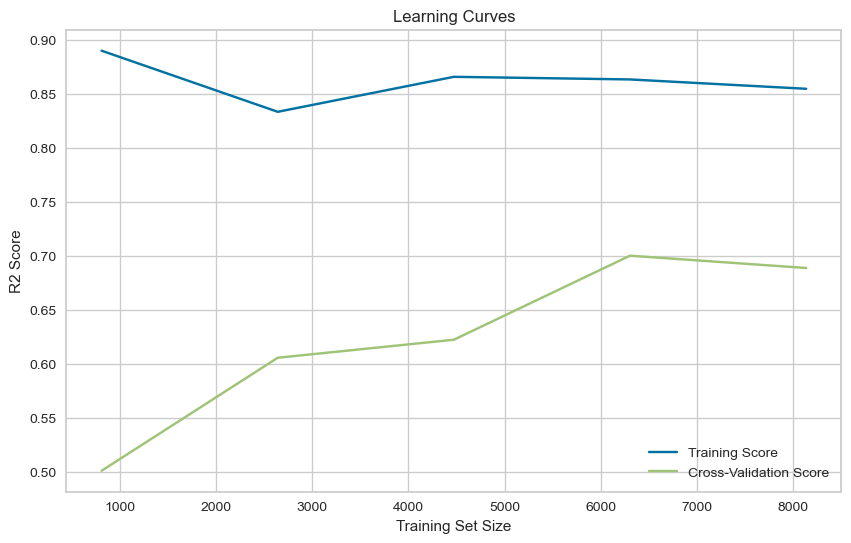

In [553]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(gbr, X, y, cv=5)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('R2 Score')
plt.title('Learning Curves')
plt.legend()
plt.show()

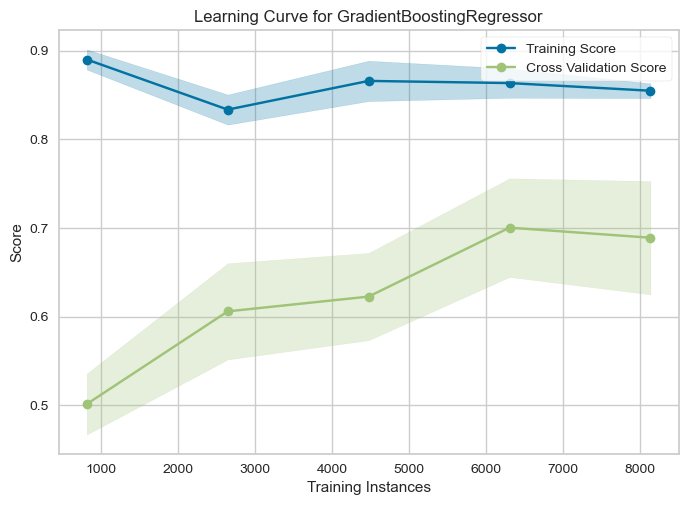

In [552]:
from yellowbrick.model_selection import LearningCurve

visualizer = LearningCurve(gbr, scoring='r2')

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show(); 